Ensemble method for multiclass

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annbarmekouar","key":"af98a5925614c7c43ac8114af032e739"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d khyeh0719/ptb-xl-dataset

Dataset URL: https://www.kaggle.com/datasets/khyeh0719/ptb-xl-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.72G/1.72G [00:56<00:00, 36.4MB/s]
100% 1.72G/1.72G [00:56<00:00, 32.5MB/s]


In [ ]:
!unzip ptb-xl-dataset.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19338_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19339_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19339_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19340_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19340_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19341_hr.dat  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19341_hr.hea  
  inflating: ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records500/19000/19342_hr.dat  
  inflating: ptb-x

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install nolds

In [ ]:
!pip install --upgrade tensorflow scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 901.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [ ]:
!pip install --upgrade scikit-learn imblearn


In [ ]:
!pip install nolds

In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn



In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wfdb
import os
import ast

In [ ]:
import pandas as pd
import os

In [ ]:
path = '/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'
ecg_data = pd.read_csv(path + '/ptbxl_database.csv', index_col='ecg_id')

scp_data = pd.read_csv(path + '/scp_statements.csv', index_col=0)
scp_data = scp_data[scp_data.diagnostic == 1]

In [ ]:
def load_signals(df, path):
    data = [wfdb.rdsamp(os.path.join(path, link)) for link in df.filename_lr]
    data = np.array([signal for signal, meta in data])
    return data

ecg_signal = load_signals(ecg_data, path)

In [ ]:
import numpy as np
import os
import pandas as pd
from scipy.signal import butter, filtfilt, welch
from biosppy.signals import ecg
from biosppy.signals.ecg import hamilton_segmenter
import wfdb
import matplotlib.pyplot as plt
import nolds

# Define the path and load your datasets
path = '/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'
ecg_data = pd.read_csv(os.path.join(path, 'ptbxl_database.csv'), index_col='ecg_id')

# Define the bandpass filter function with adjustable order
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Load ECG signals using the WFDB package
def load_signal(filename, path):
    full_path = os.path.join(path, filename)
    signal, _ = wfdb.rdsamp(full_path)
    return signal

# Process ECG signals for all patients and leads
def process_all_patients_records(ecg_data, path, sampling_rate=100):
    all_patients_features = []

    for index, row in ecg_data.iterrows():
        filename = row['filename_lr']
        ecg_signal = load_signal(filename, path)
        patient_features = {
            'mean_heartbeats': [],
            'qrs_features': [],
            'r_peaks': [],
            'sample_entropy': [],
            'rr_intervals': []  # Storing R-R intervals
        }

        for lead_index in range(ecg_signal.shape[1]):
            lead_signal = ecg_signal[:, lead_index]
            normalized_lead = (lead_signal - np.min(lead_signal)) / (np.max(lead_signal) - np.min(lead_signal))
            filtered_lead = bandpass_filter(normalized_lead, 0.5, 40.0, sampling_rate)

            # Detect R-peaks
            rpeaks_data = hamilton_segmenter(filtered_lead, sampling_rate=sampling_rate)
            r_peaks = rpeaks_data['rpeaks']
            rr_intervals = np.diff(r_peaks) / sampling_rate  # Calculate R-R intervals in seconds

            heartbeats = []
            entropy_values = []
            for r_peak in r_peaks:
                if r_peak - int(0.2 * sampling_rate) >= 0 and r_peak + int(0.4 * sampling_rate) < len(filtered_lead):
                    heartbeat = filtered_lead[r_peak - int(0.2 * sampling_rate):r_peak + int(0.4 * sampling_rate)]
                    heartbeats.append(heartbeat)
                    entropy_values.append(nolds.sampen(heartbeat))

            if heartbeats:
                mean_heartbeat = np.mean(np.vstack(heartbeats), axis=0)
            else:
                mean_heartbeat = np.zeros((int(0.6 * sampling_rate),))

            qrs_features = []
            for r_peak in r_peaks:
                qrs_start = max(r_peak - int(0.05 * sampling_rate), 0)
                qrs_end = min(r_peak + int(0.05 * sampling_rate), len(filtered_lead))
                qrs_complex = filtered_lead[qrs_start:qrs_end]
                qrs_width = (qrs_end - qrs_start) / sampling_rate
                qrs_amplitude = max(qrs_complex) - min(qrs_complex)
                qrs_features.append([qrs_width, qrs_amplitude])

            patient_features['mean_heartbeats'].append(mean_heartbeat)
            patient_features['qrs_features'].append(np.mean(qrs_features, axis=0) if qrs_features else [0, 0])
            patient_features['r_peaks'].append(r_peaks)
            patient_features['rr_intervals'].append(rr_intervals)
            patient_features['sample_entropy'].append(np.mean(entropy_values) if entropy_values else 0)

        all_patients_features.append(patient_features)

    return all_patients_features

# Process and store data
all_patients_features = process_all_patients_records(ecg_data, path)


<ipython-input-18-9756fb705f6f>:47: RuntimeWarning: invalid value encountered in divide
  normalized_lead = (lead_signal - np.min(lead_signal)) / (np.max(lead_signal) - np.min(lead_signal))


In [ ]:
# number of different values
ecg_data[[col for col in ecg_data.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

patient_id                      18885
age                                94
sex                                 2
height                             77
weight                            127
nurse                              12
site                               51
device                             11
recording_date                  21813
report                           9883
heart_axis                          8
infarction_stadium1                 6
infarction_stadium2                 3
validated_by                       12
second_opinion                      2
initial_autogenerated_report        2
validated_by_human                  2
baseline_drift                    321
static_noise                      124
burst_noise                       103
electrodes_problems                14
extra_beats                       128
pacemaker                           4
strat_fold                         10
filename_lr                     21837
filename_hr                     21837
dtype: int64

In [ ]:
# number of null values
ecg_data.isnull().sum()

patient_id                          0
age                                89
sex                                 0
height                          14854
weight                          12408
nurse                            1509
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8505
infarction_stadium1             16211
infarction_stadium2             21734
validated_by                     9411
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20230
static_noise                    18575
burst_noise                     21224
electrodes_problems             21807
extra_beats                     19883
pacemaker                       21544
strat_fold                          0
filename_lr                         0
filename_hr 

In [ ]:
ecg_data

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [ ]:
ecg_data['scp_codes'] = ecg_data['scp_codes'].apply(lambda x: ast.literal_eval(x))

In [ ]:
import pandas as pd
def superclasses(scp):
    res = set()
    for k in scp.keys():
        if k in scp_data.index:
            res.add(scp_data.loc[k].diagnostic_class)

    return list(res)

ecg_data['scp_classes'] = ecg_data['scp_codes'].apply(superclasses)

In [ ]:
Z = pd.DataFrame(0, index=ecg_data.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')

for i in Z.index:
    for j in ecg_data.loc[i, 'scp_classes']:
        Z.loc[i, j] = 1

Z['NORM'] = Z['NORM'].fillna(0)
Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [ ]:
ecg_data['binary_label'] = Z.drop(columns=['NORM']).sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [ ]:
def filter_main_classes(scp):
    main_classes = ['NORM', 'MI', 'STTC', 'CD', 'HYP']  # Main classes you are interested in
    res = set()
    for k in scp.keys():
        class_name = scp_data.loc[k].diagnostic_class if k in scp_data.index else None
        if class_name in main_classes:
            res.add(class_name)
    return list(res)

ecg_data['main_classes'] = ecg_data['scp_codes'].apply(filter_main_classes)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(classes=['NORM', 'MI', 'STTC', 'CD', 'HYP'])
Y = mlb.fit_transform(ecg_data['main_classes'])

In [ ]:
print("Records with no main class:", len(ecg_data) - np.sum(np.any(Y, axis=1)))

Records with no main class: 407


In [ ]:
# Sum each column to see how many samples belong to each class
class_counts = np.sum(Y, axis=0)
print("Class distribution:", dict(zip(mlb.classes_, class_counts)))

Class distribution: {'NORM': 9528, 'MI': 5486, 'STTC': 5250, 'CD': 4907, 'HYP': 2655}


In [ ]:
# Advanced feature engineering example
from scipy.stats import skew, kurtosis
from scipy.signal import welch

def aggregate_advanced_features(all_patients_features):
    aggregated_features = []
    for patient_features in all_patients_features:
        patient_agg_features = []

        # Aggregate mean heartbeats (flatten and take statistical features)
        mean_heartbeats_flat = np.hstack(patient_features["mean_heartbeats"])
        patient_agg_features.extend([
            np.mean(mean_heartbeats_flat),
            np.std(mean_heartbeats_flat),
            np.percentile(mean_heartbeats_flat, 25),
            np.percentile(mean_heartbeats_flat, 75),
            skew(mean_heartbeats_flat),
            kurtosis(mean_heartbeats_flat)
        ])

        # Aggregate QRS features
        qrs_features_flat = np.vstack(patient_features["qrs_features"])
        patient_agg_features.extend([
            np.mean(qrs_features_flat, axis=0)[0],
            np.mean(qrs_features_flat, axis=0)[1],
            np.std(qrs_features_flat, axis=0)[0],
            np.std(qrs_features_flat, axis=0)[1]
        ])

        # Aggregate R-peaks (e.g., count)
        patient_agg_features.append(np.mean([len(peaks) for peaks in patient_features["r_peaks"]]))

        # Aggregate Sample Entropy (mean and std)
        sample_entropy_flat = np.hstack(patient_features["sample_entropy"])
        patient_agg_features.extend([
            np.mean(sample_entropy_flat),
            np.std(sample_entropy_flat)
        ])

        # Aggregate R-R intervals (mean and std)
        rr_intervals_flat = np.hstack(patient_features["rr_intervals"])
        patient_agg_features.extend([
            np.mean(rr_intervals_flat),
            np.std(rr_intervals_flat)
        ])

        # Power spectral density (PSD) features
        f, psd = welch(mean_heartbeats_flat, fs=100)
        patient_agg_features.extend([
            np.mean(psd),
            np.std(psd)
        ])

        aggregated_features.append(patient_agg_features)

    return np.array(aggregated_features)

# Aggregate the advanced features
aggregated_features = aggregate_advanced_features(all_patients_features)
print("Shape of aggregated features:", aggregated_features.shape)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Shape of aggregated features: (21837, 17)


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming class_columns and Z are defined as before
class_columns = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
y = np.argmax(Z[class_columns].values, axis=1)  # Convert boolean flags to class indices

# Convert aggregated_features to numpy array if it is not already
aggregated_features = np.array(aggregated_features)

# Replace NaN, infinity, and large values
aggregated_features = np.nan_to_num(aggregated_features, nan=np.nanmean(aggregated_features), posinf=np.nanmean(aggregated_features), neginf=np.nanmean(aggregated_features))

# Set a maximum threshold for large values (e.g., replace values larger than 1e6 with 1e6)
aggregated_features = np.clip(aggregated_features, a_min=None, a_max=1e6)

# Verify no problematic values are present
print("Any NaN values in the cleaned features:", np.any(np.isnan(aggregated_features)))
print("Any infinity values in the cleaned features:", np.any(np.isinf(aggregated_features)))

# Assuming 'mean_heartbeats' length is 6, 'qrs_features' length is 4, and 'rr_intervals' length is 2
mean_heartbeats_length = 6
qrs_features_length = 4
rr_intervals_length = 2

# Indices for feature extraction
qrs_start_idx = mean_heartbeats_length
rr_intervals_start_idx = mean_heartbeats_length + qrs_features_length

# Extract the selected features
mean_heartbeats = aggregated_features[:, :mean_heartbeats_length]
qrs_features = aggregated_features[:, qrs_start_idx:qrs_start_idx + qrs_features_length]
rr_intervals = aggregated_features[:, rr_intervals_start_idx:rr_intervals_start_idx + rr_intervals_length]

# Combine the selected features
selected_features = np.hstack([mean_heartbeats, qrs_features, rr_intervals])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42, shuffle=True)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("New class distribution after SMOTE:", Counter(y_train_resampled))

# One-hot encode the training labels
encoder = OneHotEncoder(sparse_output=False)
y_train_resampled_encoded = encoder.fit_transform(y_train_resampled.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Initialize and apply scalers for the features
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Check the shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


Any NaN values in the cleaned features: False
Any infinity values in the cleaned features: False
New class distribution after SMOTE: Counter({1: 7952, 0: 7952, 2: 7952, 3: 7952, 4: 7952})
X_train_scaled shape: (39760, 12)
X_test_scaled shape: (4368, 12)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

def create_regularized_cnn_lstm_model(input_shape):
    inputs = Input(shape=input_shape, name='input_layer')

    # CNN part
    x = Conv1D(filters=64, kernel_size=3, padding='same', kernel_regularizer=l2(1e-3))(inputs)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.4)(x)

    x = Conv1D(filters=128, kernel_size=3, padding='same', kernel_regularizer=l2(1e-3))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.4)(x)

    x = Conv1D(filters=256, kernel_size=3, padding='same', kernel_regularizer=l2(1e-3))(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.4)(x)

    x = TimeDistributed(Flatten())(x)  # Ensure the data is in the right shape for LSTM

    # LSTM part
    x = LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-3))(x)
    x = LSTM(64, kernel_regularizer=l2(1e-3))(x)
    x = Dropout(0.5)(x)

    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


def create_regularized_dense_model(input_shape):
    inputs = Input(shape=input_shape, name='input_layer')

    # Dense part
    x = Dense(512, activation='relu', kernel_regularizer=l2(1e-3))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    outputs = Dense(5, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Define input shape based on your feature set
input_shape_cnn_lstm = (X_train_scaled.shape[1], 1)

# Reshape data for CNN-LSTM
X_train_cnn_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_cnn_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create and compile the CNN-LSTM model
cnn_lstm_model = create_cnn_lstm_model(input_shape_cnn_lstm)

# Define callbacks
early_stopping_cnn_lstm = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
reduce_lr_cnn_lstm = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=7, min_lr=1e-6, verbose=1)

# Train the CNN-LSTM model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train_resampled_encoded,
                                      validation_data=(X_test_cnn_lstm, y_test_encoded),
                                      epochs=50, batch_size=32, callbacks=[early_stopping_cnn_lstm, reduce_lr_cnn_lstm])

print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3028 - loss: 1.5624 - val_accuracy: 0.4455 - val_loss: 1.3370 - learning_rate: 1.0000e-04
Epoch 2/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4388 - loss: 1.3588 - val_accuracy: 0.4439 - val_loss: 1.3135 - learning_rate: 1.0000e-04
Epoch 3/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.4605 - loss: 1.3214 - val_accuracy: 0.4558 - val_loss: 1.2942 - learning_rate: 1.0000e-04
Epoch 4/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.4719 - loss: 1.3042 - val_accuracy: 0.4986 - val_loss: 1.2556 - learning_rate: 1.0000e-04
Epoch 5/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4770 - loss: 1.2852 - val_accuracy: 0.4748 - val_loss: 1.2636 - learning_rate: 1.0000e-04
Epoch 6/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.4924 - loss: 1.2635 - val_accuracy: 0.4915 - val_loss: 1.2436 - learning_rate: 1.0000e-04
Epoch 7/50
1243/1243 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Define input shape based on your feature set
input_shape_dense = (X_train_scaled.shape[1],)

# Create and compile the Dense model
dense_model = create_dense_model(input_shape_dense)

# Define callbacks
early_stopping_dense = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
reduce_lr_dense = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=7, min_lr=1e-6, verbose=1)

# Train the Dense model
history_dense = dense_model.fit(X_train_scaled, y_train_resampled_encoded,
                                validation_data=(X_test_scaled, y_test_encoded),
                                epochs=50, batch_size=32, callbacks=[early_stopping_dense, reduce_lr_dense])


Epoch 1/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3052 - loss: 2.2080 - val_accuracy: 0.4119 - val_loss: 1.4364 - learning_rate: 1.0000e-04
Epoch 2/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3876 - loss: 1.7292 - val_accuracy: 0.4251 - val_loss: 1.3802 - learning_rate: 1.0000e-04
Epoch 3/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4177 - loss: 1.5388 - val_accuracy: 0.4581 - val_loss: 1.3421 - learning_rate: 1.0000e-04
Epoch 4/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4372 - loss: 1.4399 - val_accuracy: 0.4840 - val_loss: 1.2987 - learning_rate: 1.0000e-04
Epoch 5/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4529 - loss: 1.3887 - val_accuracy: 0.4620 - val_loss: 1.3127 - learning_rate: 1.0000e-04
Epoch 6/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4742 - loss: 1.3339 - val_accuracy: 0.4835 - val_loss: 1.2838 - learning_rate: 1.0000e-04
Epoch 7/50
1243/1243 ━━━━━━━━━━━━━━━━━━━━ 21s 

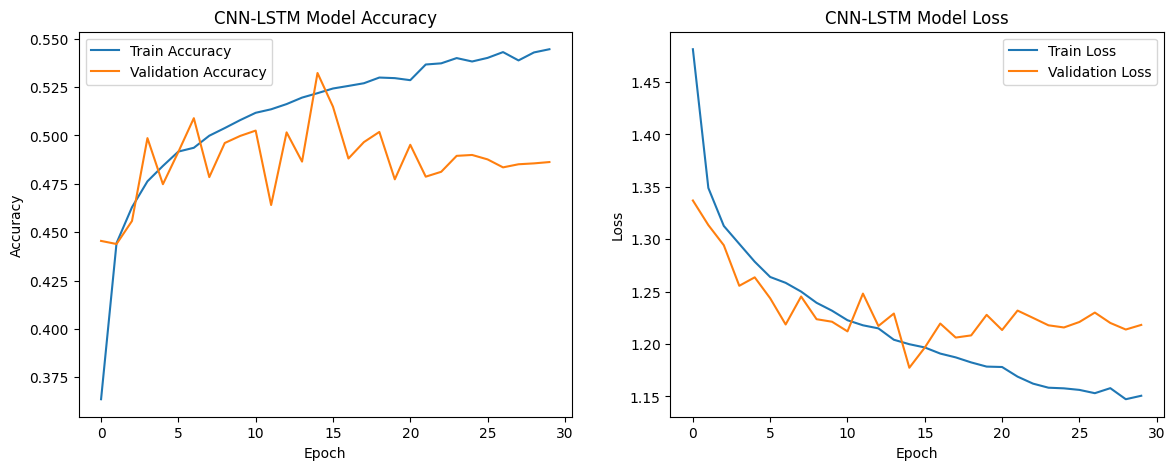

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy for CNN-LSTM model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN-LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn_lstm.history['loss'], label='Train Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN-LSTM Model Loss')

plt.show()


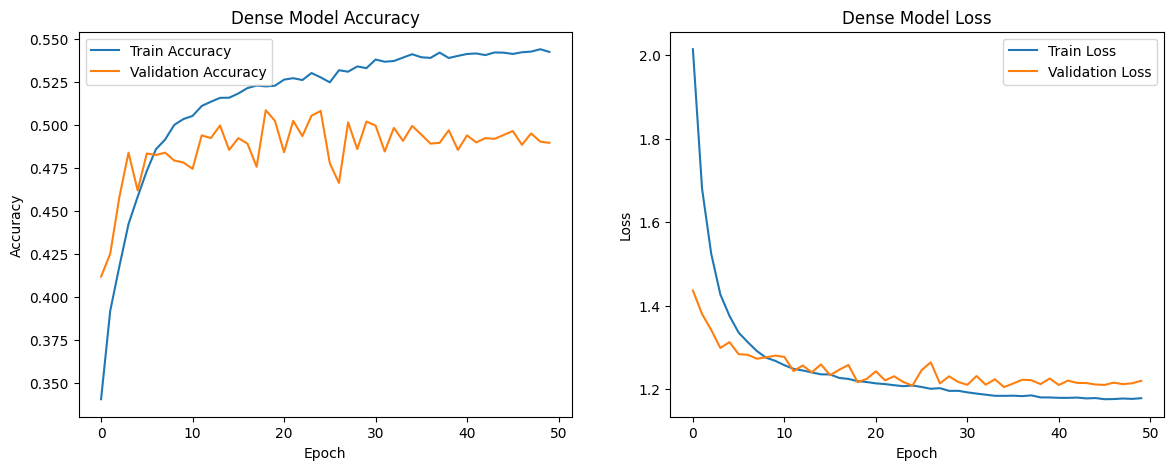

In [ ]:
# Plot accuracy for Dense model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Train Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Dense Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Train Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Dense Model Loss')

plt.show()


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Ensemble Test Accuracy: 51.76%


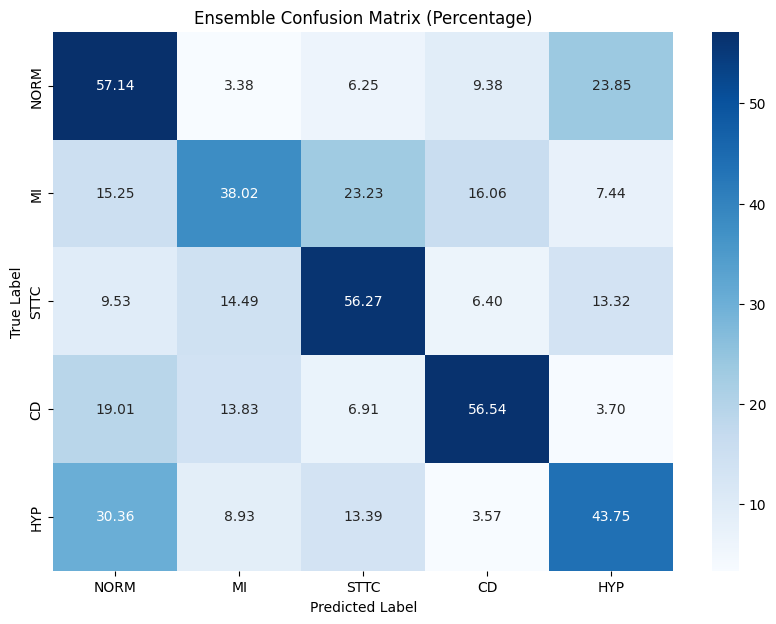

              precision    recall  f1-score   support

        NORM       0.76      0.57      0.65      1983
          MI       0.63      0.38      0.47      1102
        STTC       0.50      0.56      0.53       766
          CD       0.36      0.57      0.44       405
         HYP       0.07      0.44      0.12       112

    accuracy                           0.52      4368
   macro avg       0.46      0.50      0.44      4368
weighted avg       0.63      0.52      0.55      4368



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate predictions for the CNN-LSTM model
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)

# Generate predictions for the Dense model
y_pred_dense = dense_model.predict(X_test_scaled)

# Combine predictions by averaging
y_pred_ensemble = (y_pred_cnn_lstm + y_pred_dense) / 2

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_ensemble, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)


# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Ensemble Test Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_columns, yticklabels=class_columns)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Ensemble Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_columns))


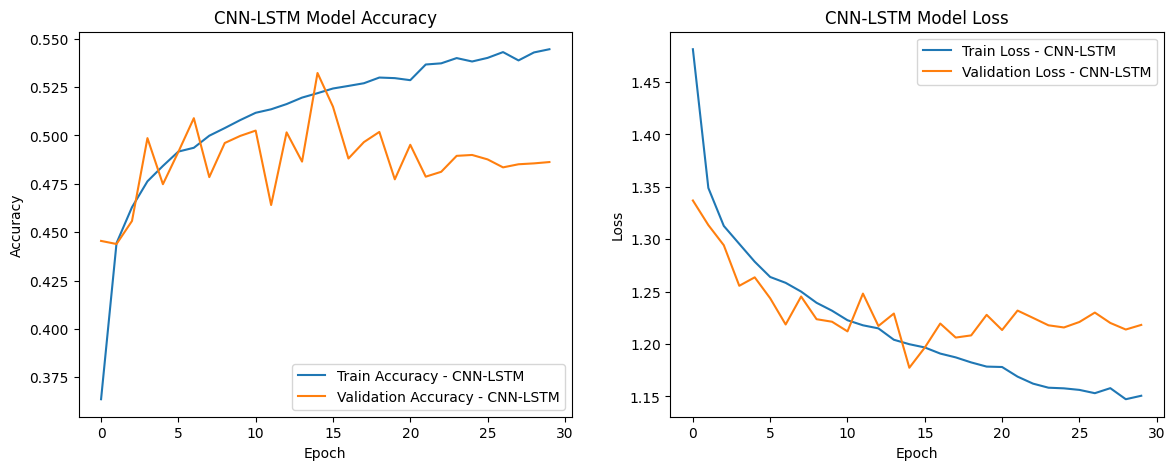

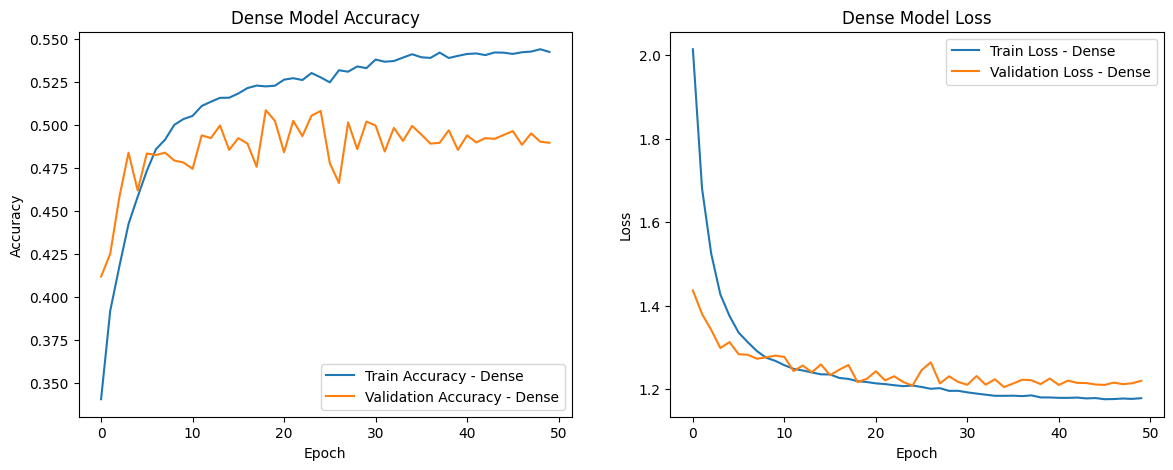

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy for CNN-LSTM model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn_lstm.history['accuracy'], label='Train Accuracy - CNN-LSTM')
plt.plot(history_cnn_lstm.history['val_accuracy'], label='Validation Accuracy - CNN-LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN-LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn_lstm.history['loss'], label='Train Loss - CNN-LSTM')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss - CNN-LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN-LSTM Model Loss')

plt.show()

# Plot accuracy for Dense model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Train Accuracy - Dense')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy - Dense')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Dense Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Train Loss - Dense')
plt.plot(history_dense.history['val_loss'], label='Validation Loss - Dense')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Dense Model Loss')

plt.show()


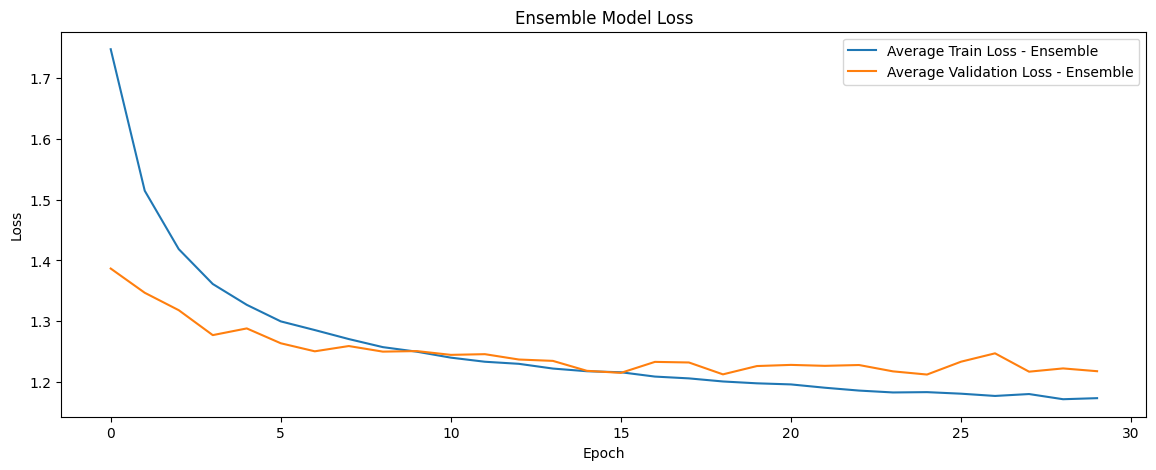

In [ ]:
import matplotlib.pyplot as plt

# Ensure both models have the same number of epochs
num_epochs = min(len(history_cnn_lstm.history['loss']), len(history_dense.history['loss']))

# Calculate average training and validation losses
avg_train_loss = [(history_cnn_lstm.history['loss'][i] + history_dense.history['loss'][i]) / 2 for i in range(num_epochs)]
avg_val_loss = [(history_cnn_lstm.history['val_loss'][i] + history_dense.history['val_loss'][i]) / 2 for i in range(num_epochs)]

# Plot training and validation loss
plt.figure(figsize=(14, 5))

plt.plot(avg_train_loss, label='Average Train Loss - Ensemble')
plt.plot(avg_val_loss, label='Average Validation Loss - Ensemble')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Ensemble Model Loss')
plt.show()


In [ ]:
# Print the summaries of the individual models
print("CNN-LSTM Model Summary:")
cnn_lstm_model.summary()

print("\nDense Model Summary:")
dense_model.summary()


CNN-LSTM Model Summary:


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_22 (Conv1D)                   │ (None, 12, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 12, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_22 (MaxPooling1D)      │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_23 (Conv1D)                   │ (None, 6, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 6, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_24 (Conv1D)                   │ (None, 3, 256)              │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 3, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 3, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_24 (MaxPooling1D)      │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 1, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 64)                  │              

 Total params: 1,114,705 (4.25 MB)

 Trainable params: 371,269 (1.42 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 742,540 (2.83 MB)


Dense Model Summary:


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,428 (1.33 MB)

 Trainable params: 173,317 (677.02 KB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 173,319 (677.03 KB)

137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


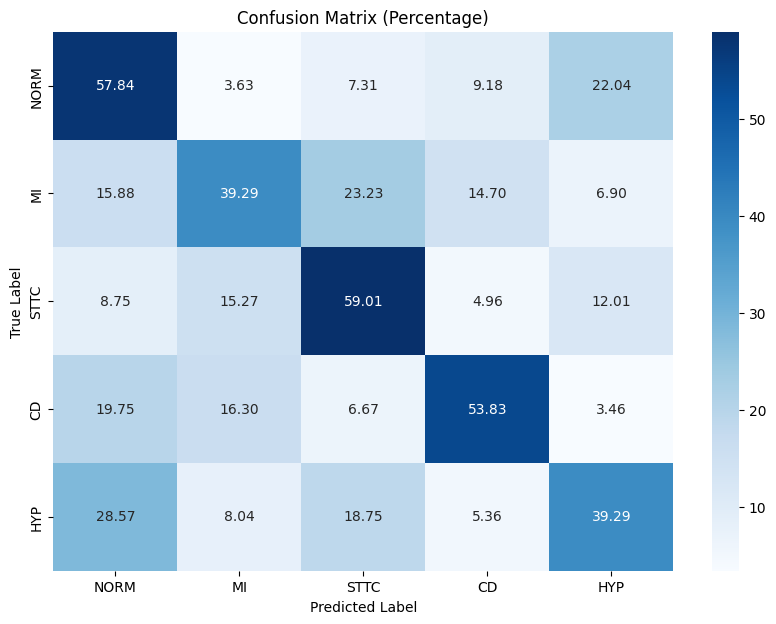

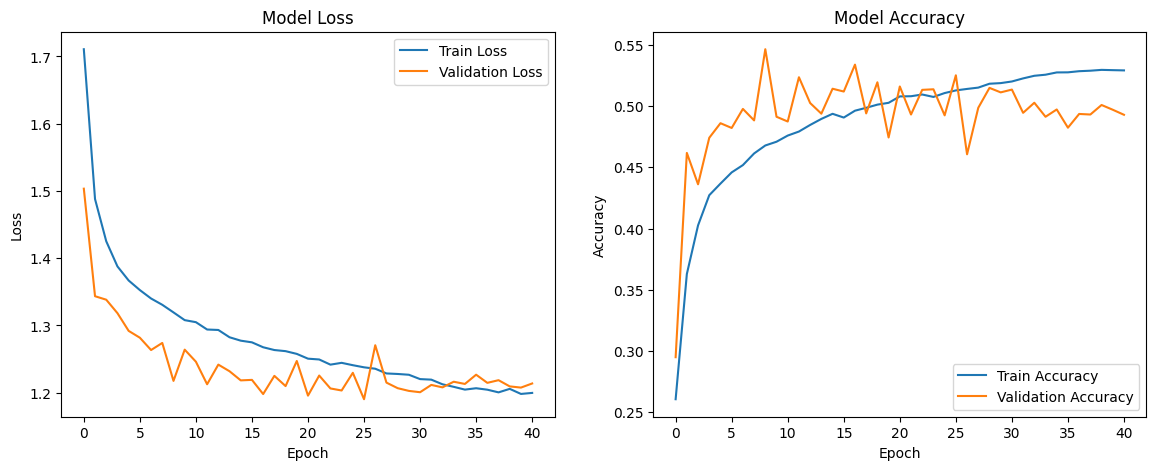

In [ ]:
#Ancien model
# Plot confusion matrix
y_pred = hybrid_model.predict(X_test_hybrid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_columns, yticklabels=class_columns)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Plot learning curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.show()


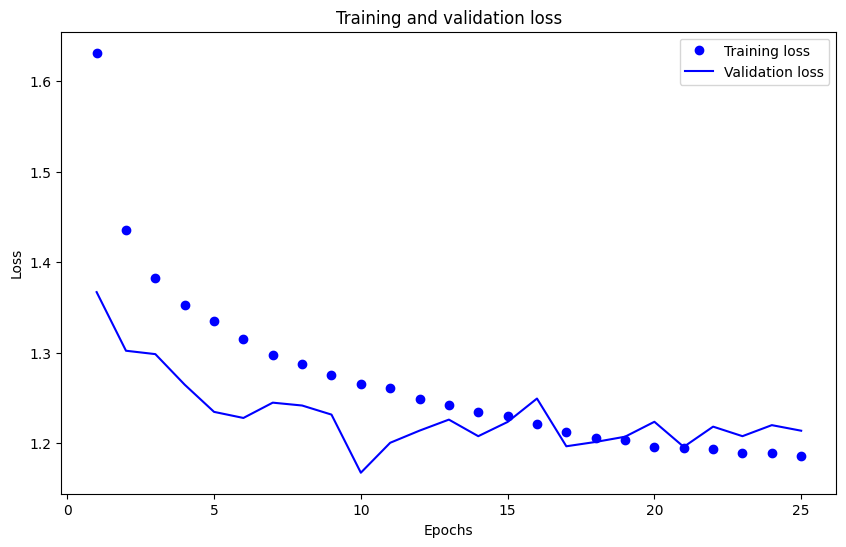

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

# Extract the loss values for training and validation
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(loss_values) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')  # 'bo' means blue color, dot markers
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')  # 'b' means blue color, solid line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()